### Objective: 
To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers

### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit
cards the customer has, and different channels through which customer has
contacted the bank for any queries, different channels include visiting the bank,
online and through a call centre. 

### Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your
disposal and to get an idea about the no of clusters. Perform EDA, create
visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the
notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10
marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram
and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and
answer all the key questions. (10 marks)

In [1]:
# Import all necessary modules and load the data
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics import silhouette_score

In [2]:
# Import the file
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.shape

(660, 7)

In [4]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
LifeCreditDf = df.copy()

for i in LifeCreditDf.columns:
    x = LifeCreditDf[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: Sl_No and it value is: 660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64

Column name is: Customer Key and it value is: 47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

Column name is: Avg_Credit_Limit and it value is: 8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

Column name is: Total_Credit_Cards and it value is: 4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

Column name is: Total_visits_bank and it value is: 2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

Column name is: Total_visits

In [8]:
df_new = df.copy()
df_new.drop(['Customer Key'], axis=1, inplace=True)
df_new.sort_values('Avg_Credit_Limit', axis=0, ascending=True)

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
9,10,3000,4,0,1,7
329,330,5000,7,4,2,4
46,47,5000,1,2,2,5
317,318,5000,5,5,0,4
312,313,5000,7,3,1,4
...,...,...,...,...,...,...
646,647,186000,7,0,8,1
632,633,187000,7,1,7,0
650,651,195000,10,1,12,2
631,632,195000,8,0,15,0


### Print the descriptive statistics of each & every column using describe() function

In [9]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [10]:
# To find customer with 0 credit limitt or no credit cards.

print(df_new['Avg_Credit_Limit'] == 0 )
print(df_new['Total_Credit_Cards'] == 0)

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Name: Avg_Credit_Limit, Length: 660, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Name: Total_Credit_Cards, Length: 660, dtype: bool


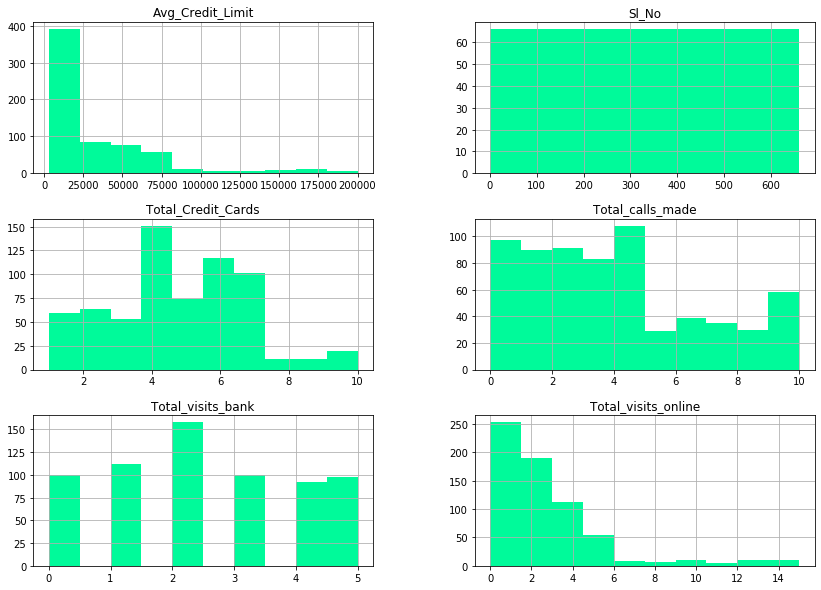

In [11]:
import matplotlib.pyplot as plt

df_new.hist(bins=10, figsize=(14,10), color="#00FA9A")
plt.show()

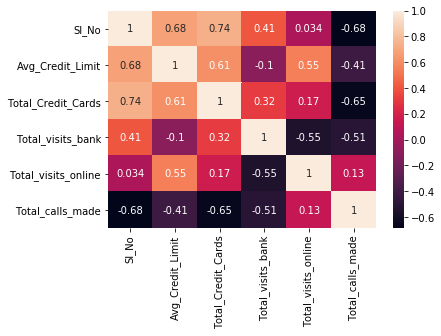

In [12]:
corr = df_new.corr()
sns.heatmap(corr, annot = True)

# Observations:
1. No missing vales
2. No Customer with zero credit limit.
3. No Customer with No Credit cards.
4. Unique Customer Key doesnot seems like important data.

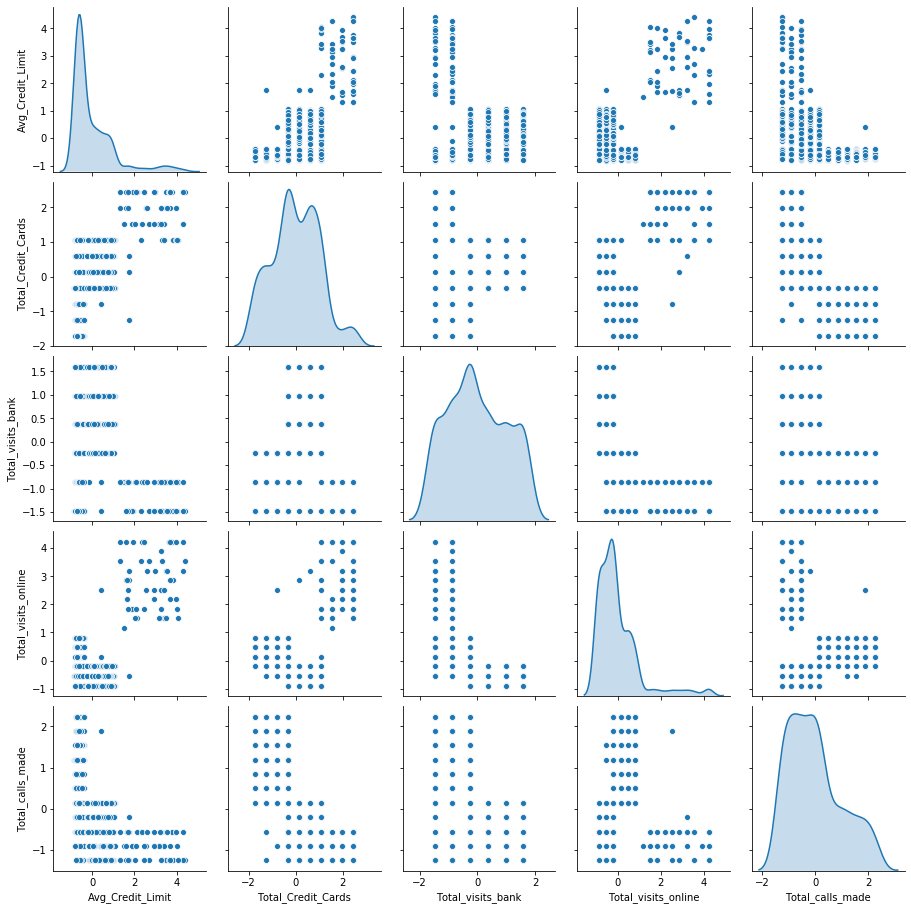

In [13]:
dfAttr=df_new.iloc[:,1:]
dfScaled=dfAttr.apply(zscore)
sns.pairplot(dfScaled,diag_kind='kde')

## Group Data into similar clusters (K means)

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

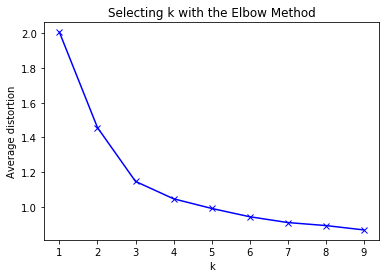

In [14]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

let us look at 3 clusters and 5 clusters

In [15]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df_new["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df_new.head()


score = silhouette_score(df_new, prediction)
score

Groups Assigned : 



0.19421964600896724

### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.

In [16]:
dfClust = df_new.groupby(['GROUP'])
dfClust.mean()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,117.857143,12174.107143,2.410714,0.933036,3.553571,6.870536
1,417.528497,33782.383420,5.515544,3.489637,0.981865,2.000000
2,611.280000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BFDFACA48>,
      dtype=object)

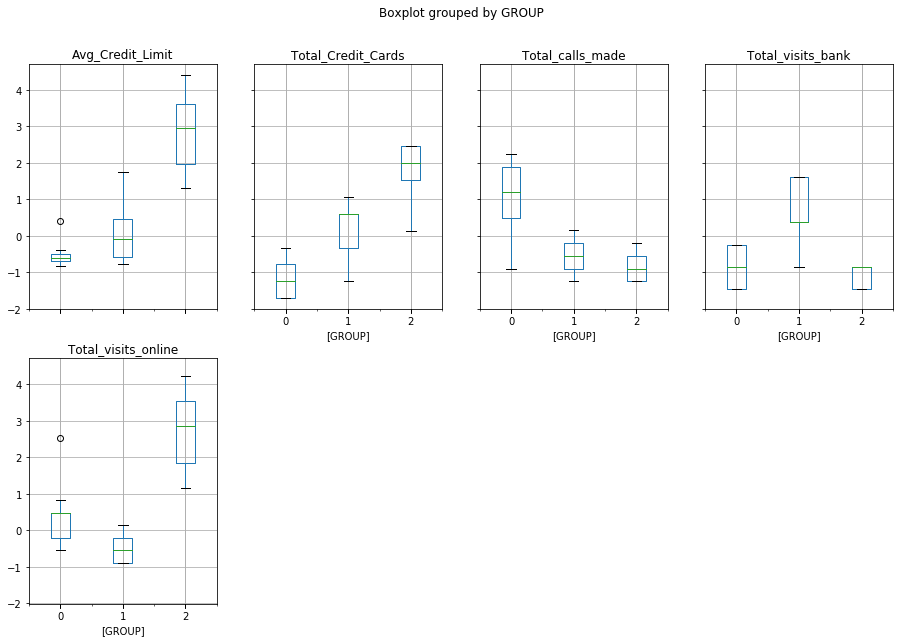

In [17]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [18]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df_new["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df_new.head()


score = silhouette_score(df_new, prediction)
score

Groups Assigned : 



-0.15689568804200893

In [19]:
dfClust = df_new.groupby(['GROUP'])
dfClust.mean()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,419.627551,36260.204082,5.551020,2.494898,0.954082,2.061224
1,611.280000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,113.045872,11697.247706,2.504587,1.036697,3.385321,5.155963
3,415.363158,31226.315789,5.478947,4.515789,1.010526,1.936842
4,122.417391,12626.086957,2.321739,0.834783,3.713043,8.495652


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BFF730988>,
      dtype=object)

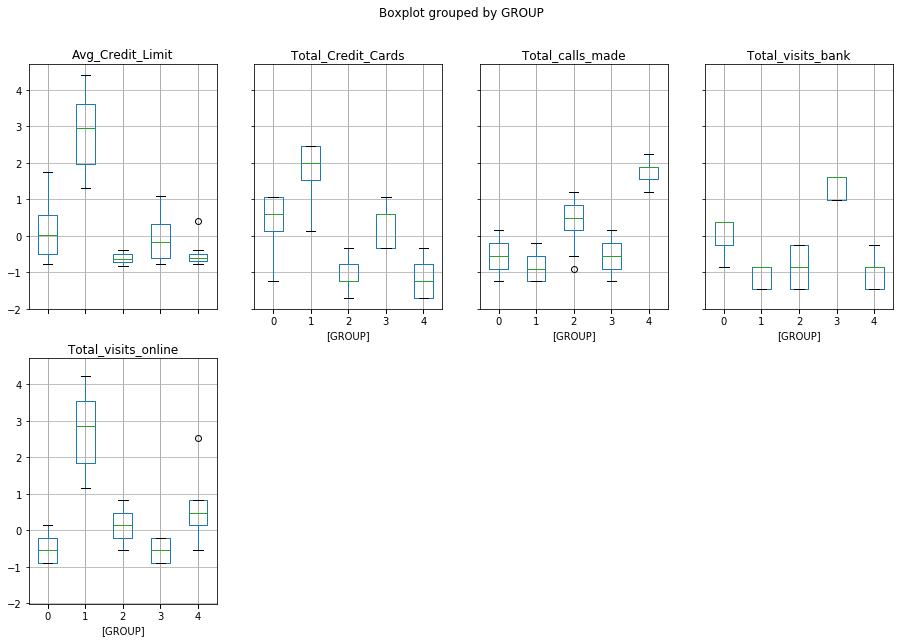

In [20]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#K means silhouette_score
k = 3 : 0.1942196461394193
k = 5 : -0.15695817154334915

K-means with 3 cluster, the silhoutte score looks okay.

# Hierarchical Clustering

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(dfScaled),columns=dfScaled.columns)

In [23]:
X_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,-1.311877
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1.356347
2,0.410293,1.058973,-0.860451,0.134290,0.145528,-1.311877
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,-1.311877
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,-0.644821


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
links=['single','complete','average','ward','median']
for each in links:
    Z = linkage(X_std, method=each, metric='euclidean')
    cc,cophn_dist=cophenet(Z,pdist(X_std))
    print (each,cc)

single 0.8101498128308329
complete 0.8909404913064982
average 0.898503699845416
ward 0.7568806875571983
median 0.8635765724990666


### Find out the linkage matrix

In [25]:
links=['single','complete','average','ward','median']

In [26]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'single', metric='euclidean')
Z.shape

(659, 4)

In [27]:
Z[:]

array([[4.64000000e+02, 4.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.25000000e+02, 4.55000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.50000000e+02, 3.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.26900000e+03, 1.31500000e+03, 1.41658647e+00, 6.09000000e+02],
       [1.31200000e+03, 1.31600000e+03, 1.83244995e+00, 6.59000000e+02],
       [1.00000000e+00, 1.31700000e+03, 1.92949629e+00, 6.60000000e+02]])

### Plot the dendrogram for the consolidated dataframe

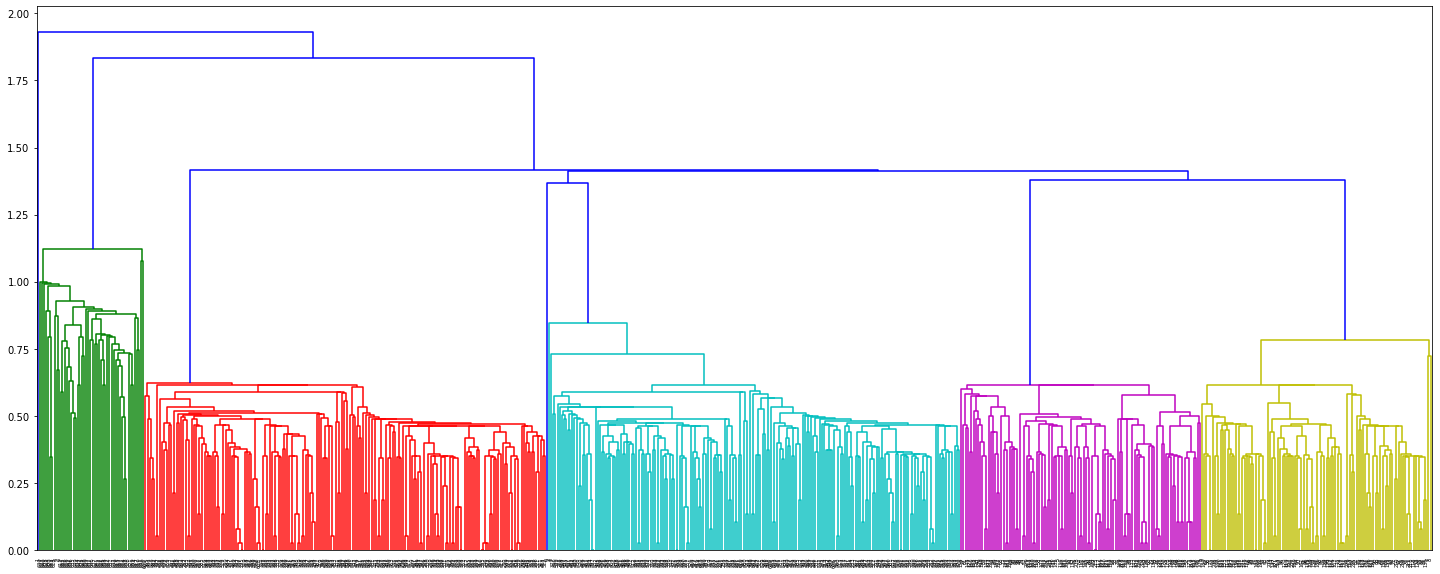

In [28]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

### From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

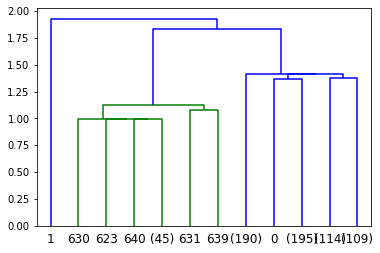

In [29]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [30]:
max_d = 1.75

### Use this distance measure(max_d) and fcluster function to cluster the data into different groups

In [31]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)

{1, 2, 3}

In [32]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(X_std,clusters)

0.32393581561912965

Silhouette Score is better when closer 1 and worse when closer to -1

here, it is not so great.

### Final dendogram with 'ward linkage'

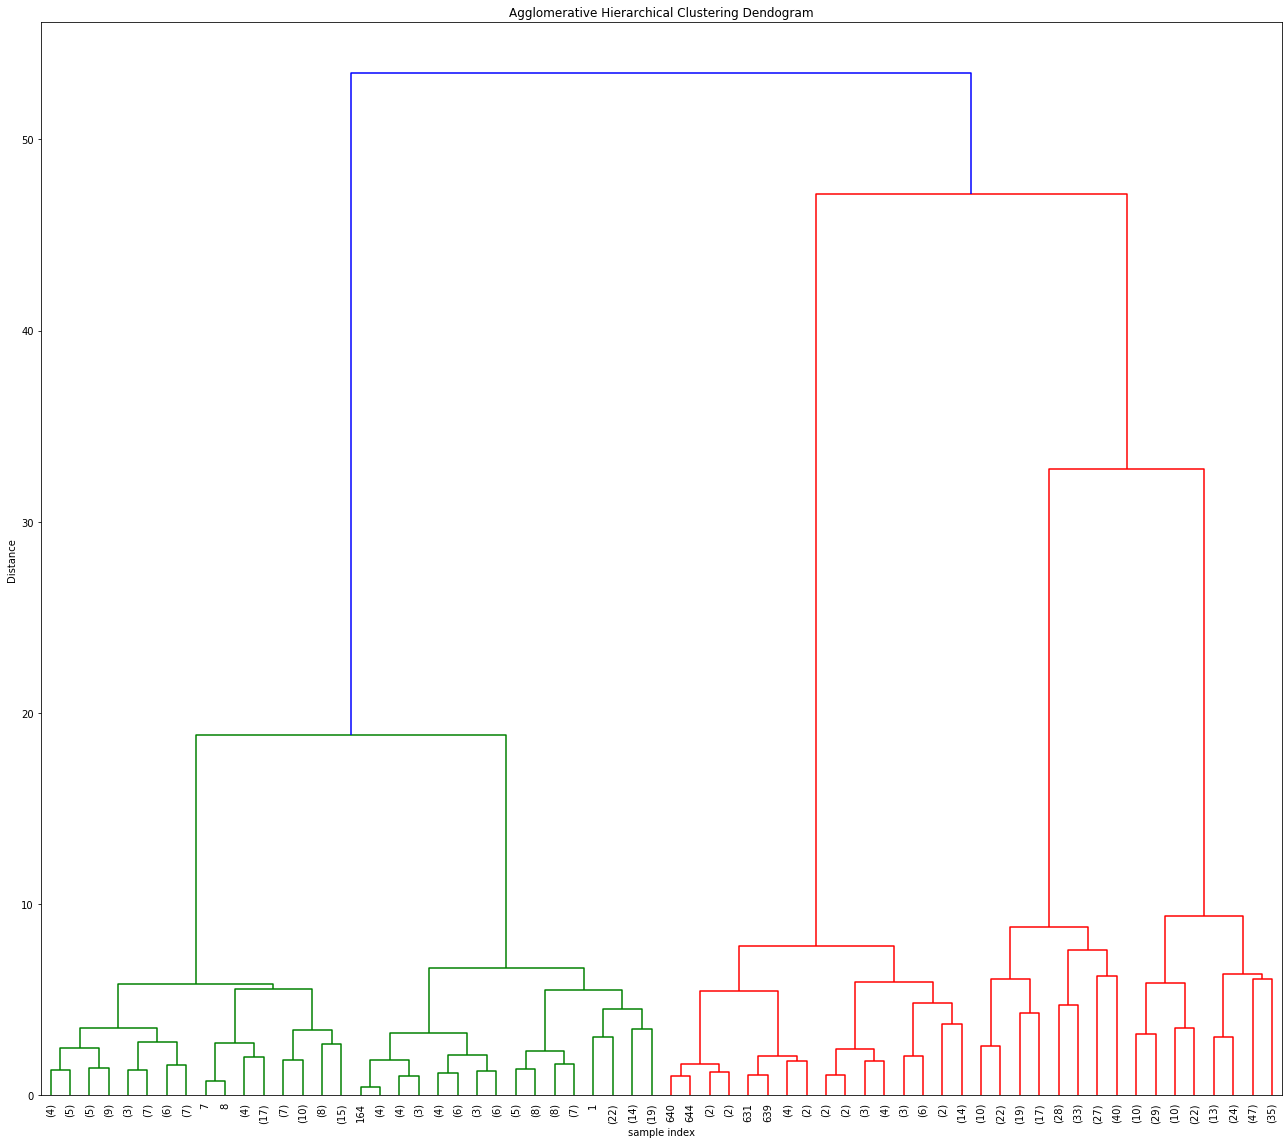

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [34]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(dfScaled)

array([1, 2, 1, 1, 3, 2, 3, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
for each in np.arange(0.1,1.1,0.1):
    model=DBSCAN(eps=each,min_samples=5)
    model.fit(X_std)
    print (each, set(model.labels_))

0.1 {-1}
0.2 {-1}
0.30000000000000004 {-1}
0.4 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, -1}
0.5 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, -1}
0.6 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}
0.7000000000000001 {0, 1, 2, 3, -1}
0.8 {0, 1, 2, 3, 4, -1}
0.9 {0, 1, 2, 3, 4, 5, -1}
1.0 {0, 1, 2, 3, 4, -1}


In [37]:
model.labels_

array([-1, -1,  0,  0, -1,  1, -1,  2,  2,  2,  2,  1,  1,  2,  2,  1,  2,
        2,  2,  1,  2,  1,  2,  2,  1,  1,  1,  1,  2,  1,  2,  2,  1,  2,
        1,  2,  1,  2,  1,  1,  1,  1,  2,  2,  2,  1,  2,  2,  1,  2,  1,
        2,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  2,  2,  1,  2,  2,  2,
        1,  1,  1,  2,  2,  2,  1,  2,  2,  2,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  1,  1,  2,  1,  2,  1,  2,  1,  2,  2,  1,  2,  2,  1,
        1,  1,  1,  1,  2,  2,  2,  1,  2,  1,  1,  2,  2,  2,  1,  1,  2,
        1,  2,  1,  2,  1,  2,  2,  1,  1,  2,  2,  2,  2,  2,  1,  1,  2,
        1,  1,  1,  1,  1,  2,  1,  2,  1,  2,  1,  2,  1,  1,  1,  2,  2,
        2,  1,  2,  1,  1,  1,  2,  1,  2,  2,  1,  1,  1,  1,  2,  1,  1,
        1,  2,  2,  1,  2,  2,  2,  1,  1,  2,  2,  1,  1,  1,  2,  2,  2,
        1,  2,  2,  1,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  1,  1,  2,  2,  2,  1,  1,  1,  2,  2,  1,  1,  1,
        2,  1,  1,  1,  2

# Observation.

1. Customer Key data loks less importance.
2. After execution of both k-means and Hierarchical Clustering, 
    * Hierarchical Clustering with linkage silhoutee score seems okay.
    * K-means cluster doesnot worked well with 3 0r 5 cluster group.
    * silhoutte score with hierarchical cluster with different linkage is near to 1